In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from solver import Solver

In [2]:
def node_label(node) -> str:
    if node.bound.upper - node.bound.lower <= 1e-9:
        return f"{node.var.name} = {node.bound.upper}\nI={node.iteration} D={node.depth}"
    else:
        return f"{node.bound.lower}≤{node.var.name}≤{node.bound.upper}\nI={node.iteration} D={node.depth}"

def node_color(idx, node, origins):
    #print(node.var, node.iteration, node.bound)
    if idx in origins:
        return "green"
    elif node.bound.upper - node.bound.lower <= 1e-9:
        return "blue"
    elif node.var.is_general:
        return "yellow"
    return "magenta"

In [29]:
path = "problems/supportcase16.mps"
sl = Solver(path, True)
graphes = sl.start()
print(sl.result())

number of branching: 1	primal value: None	dual value: 271.9999999999999	number of infisible nodes: 0
number of branching: 2	primal value: None	dual value: 272.0	number of infisible nodes: 0
number of branching: 3	primal value: 306.0	dual value: 272.0	number of infisible nodes: 0
number of branching: 4	primal value: 306.0	dual value: 272.0	number of infisible nodes: 0
number of branching: 5	primal value: 306.0	dual value: 272.0	number of infisible nodes: 1
number of branching: 6	primal value: 306.0	dual value: 272.0	number of infisible nodes: 1
number of branching: 7	primal value: 306.0	dual value: 272.0	number of infisible nodes: 1
number of branching: 8	primal value: 306.0	dual value: 272.0	number of infisible nodes: 1
number of branching: 9	primal value: 306.0	dual value: 272.0	number of infisible nodes: 1
number of branching: 10	primal value: 306.0	dual value: 272.0	number of infisible nodes: 1
number of branching: 11	primal value: 306.0	dual value: 272.0	number of infisible nodes: 

In [4]:
def get_pos(nodes):
    graph = {}
    for node in nodes.values():
        if (node.depth, node.iteration) not in graph:
            graph[(node.depth, node.iteration)] = [node]
        else:
            graph[(node.depth, node.iteration)].append(node)

    gr = sorted(graph.items())

    current_x = 0
    current_y = 0
    x_step, y_step = 1, -1
    current_depth = 0
    res = {}
    for (depth, it), gr_nodes in gr:
        if depth == 0 and it == 0:
            current_y = -1
        if depth != current_depth:
            current_y = 0
        for node in gr_nodes:
            res[node_label(node)] = (current_x, current_y)
            current_x += x_step
        current_y += y_step
        current_depth = depth

    return res

In [35]:
from node import Node

usefull_bound = []
number_of_checks = 0
for idx, (graph, infeas) in enumerate(graphes):
    if infeas:
        number_of_checks += 1
        nodes, _, _ = graph.to_plot_info()
        fuips = graph.find_FUIP()
        if len(fuips) == 0:
            continue
        root = Node(sl.root_node().exh.copy())
        root.exh.set_consistent()
        old_objective = root.exh.solution.objective

        root_for_inf = Node(sl.root_node().exh.copy())
        for fuip in fuips:
            root_for_inf.exh.changeColBounds(graph.nodes[fuip].var.index, graph.nodes[fuip].bound.lower, graph.nodes[fuip].bound.upper)
        root_for_inf.exh.set_consistent()
        if not root_for_inf.exh.solution.is_infeasible():
            continue

        number_of_negative = sum([graph.nodes[fuip].bound.lower > 0 for fuip in fuips])
        values = [-1 if graph.nodes[fuip].bound.lower > 0 else 1 for fuip in fuips]
        indices = [graph.nodes[fuip].var.index for fuip in fuips]
        root.exh.addRow(float(1 - number_of_negative), 
                        float("inf"), 
                        len(indices),
                        indices,
                        values
                        )
        root.exh.set_consistent()
        usefull_bound.append((number_of_negative, indices, values))

        #if root.exh.solution.objective != old_objective:
        print(indices)
        print(old_objective, root.exh.solution.objective)
        _ = list(map(lambda x: print(node_label(x)), [graph.nodes[fuip] for fuip in fuips]))
        print()

print(number_of_checks, len(usefull_bound))

[43]
272.00000000000017 272.00000000000017
B43(3) = 1
I=0 D=5

[75, 73]
272.00000000000017 272.00000000000017
B75(3) = 1
I=0 D=14
B73(4) = 0
I=0 D=7

[221, 42, 115]
272.00000000000017 272.00000000000017
B221(4) = 1
I=0 D=16
B42(4) = 0
I=0 D=12
B115(4) = 0
I=0 D=6

[293, 249, 219, 221, 42, 90, 73, 115]
272.00000000000017 272.00000000000017
B293(4) = 1
I=0 D=20
B249(4) = 0
I=0 D=19
B219(4) = 0
I=0 D=18
B221(4) = 0
I=0 D=16
B42(4) = 0
I=0 D=12
B90(3) = 0
I=0 D=11
B73(4) = 0
I=0 D=7
B115(4) = 0
I=0 D=6

[303, 293, 249, 219, 221, 42, 90, 73, 115]
272.00000000000017 272.00000000000017
B303(4) = 1
I=0 D=21
B293(4) = 0
I=0 D=20
B249(4) = 0
I=0 D=19
B219(4) = 0
I=0 D=18
B221(4) = 0
I=0 D=16
B42(4) = 0
I=0 D=12
B90(3) = 0
I=0 D=11
B73(4) = 0
I=0 D=7
B115(4) = 0
I=0 D=6

[286, 303, 293, 249, 219, 221, 42, 115]
272.00000000000017 272.00000000000017
B286(4) = 1
I=0 D=22
B303(4) = 0
I=0 D=21
B293(4) = 0
I=0 D=20
B249(4) = 0
I=0 D=19
B219(4) = 0
I=0 D=18
B221(4) = 0
I=0 D=16
B42(4) = 0
I=0 D=12
B115(

In [33]:
sl = Solver(path, True)

for ubound in usefull_bound:
    sl.root_node().exh.addRow(1 - ubound[0], float("inf"), len(ubound[1]), ubound[1], ubound[2])

sl.root_node().exh.set_consistent()
_ = sl.start()
print(sl.result())

number of branching: 1	primal value: None	dual value: 272.0	number of infisible nodes: 0
number of branching: 2	primal value: None	dual value: 271.9999999999999	number of infisible nodes: 0
number of branching: 3	primal value: None	dual value: 271.9999999999999	number of infisible nodes: 0
number of branching: 4	primal value: None	dual value: 273.33333333333326	number of infisible nodes: 0
number of branching: 5	primal value: None	dual value: 274.5	number of infisible nodes: 0
number of branching: 6	primal value: None	dual value: 274.5	number of infisible nodes: 0
number of branching: 7	primal value: None	dual value: 274.5	number of infisible nodes: 0
number of branching: 8	primal value: None	dual value: 274.5	number of infisible nodes: 0
number of branching: 9	primal value: None	dual value: 274.5	number of infisible nodes: 0
number of branching: 10	primal value: None	dual value: 274.5	number of infisible nodes: 1
number of branching: 11	primal value: None	dual value: 274.5	number of i

In [ ]:
for idx, (graph, infeas) in enumerate(graphes):
    if infeas:
        nodes, _, _ = graph.to_plot_info()
        fuips = graph.find_FUIP()
        for fuip in fuips:
            if fuip in nodes and nodes[fuip].iteration > 0:
                print(idx, node_label(nodes[fuip]))

B293(4) = 1
I=0 D=10
B249(4) = 0
I=0 D=9
B221(4) = 0
I=0 D=8
B89(4) = 1.0
I=3 D=5
B83(4) = 1
I=0 D=1


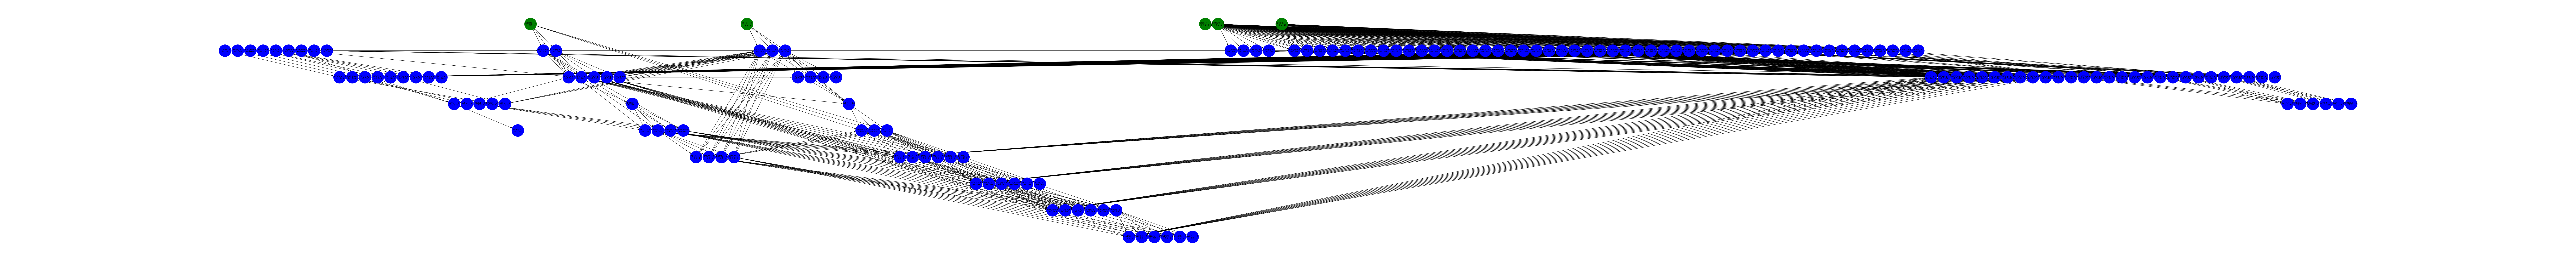

In [8]:
number_of_graph = 214
nodes, edges, origins = graphes[number_of_graph][0].to_plot_info()
fuips = graphes[number_of_graph][0].find_FUIP()
for fuip in fuips:
    print(node_label(nodes[fuip]))

G = nx.DiGraph()

for edge in edges:
    G.add_edge(node_label(nodes[edge[0]]), node_label(nodes[edge[1]]))

for node_idx in origins:
    G.add_node(node_label(nodes[node_idx]))

#pos = nx.nx_agraph.graphviz_layout(G, prog="dot")
# pos = dict([(node_label(n), (n.depth, -n.iteration)) for n in nodes.values()])
# print(pos)
pos = get_pos(nodes)

plt.figure(3,figsize=(150,15)) 
nx.draw(G,
        pos,
        with_labels=True, 
        font_size=8, 
        node_size=2600, 
        node_color=[node_color(idx, node, origins) for idx, node in nodes.items()]
       )